# **Curso Python: Ejercicios semana 02**

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

### **04_missing_values**
- Create a new column called "TA_DIC_ratio" that is the ratio of TA to DIC
- Calculate the mean and standard deviation of the "TA_DIC_ratio" for each season
- Calculate the mean and standard deviation of the "TA_DIC_ratio" for each season and area
- Save the results to an Excel file called "TA_DIC_Season_Areas.xlsx"

In [ ]:
def read_csv_to_dataframe(file_path):
 try:
  df = pd.read_csv(file_path)
  return df
 except Exception as e:
  print(f"Error reading the CSV file: {e}")
  return None
read_csv_to_dataframe("../folder_datos/Terminos_lagoon_TA_DIC_2023_RawData.csv").head(3)

,sample,date,estuary,area,station,layer_depth,season,chlorophy_microg_l,cond_microsiemens_cm,depth_m,...,do_mg_l,sal_psu,sp_cond_microsiemens_cm,turbidity_fnu,temp_c,latitude,longitude,dic_micromol_kg,ta_micromol_kg,dummy_data
0,CDL01S,5/3/2020,Candelaria,River,CDL01,Surface,Dry,0.36,7015.4,0.464,...,7.12,3.56,6547.7,1.47,28.740,18.55736,-91.25012,3915,3863,3685.0
1,CDL01F,5/3/2020,Candelaria,River,CDL01,Bottom,Dry,4.19,29886.1,7.792,...,4.90,16.97,27751.2,95.33,29.028,18.55722,-91.24990,3698,3685,NaN
2,CDL02S,5/3/2020,Candelaria,River,CDL02,Surface,Dry,0.92,16691.1,0.453,...,6.99,8.94,15429.1,5.50,29.283,18.61007,-91.24410,3724,3708,3708.0


In [3]:
dataframe = read_csv_to_dataframe("../folder_datos/Terminos_lagoon_TA_DIC_2023_RawData.csv")

> **1. Create a new column called "TA_DIC_ratio" that is the ratio of TA to DIC**

In [ ]:
dataframe['TA_DIC_ratio'] = dataframe['ta_micromol_kg']/dataframe['dic_micromol_kg']
dataframe.head(3)

,sample,date,estuary,area,station,layer_depth,season,chlorophy_microg_l,cond_microsiemens_cm,depth_m,...,sp_cond_microsiemens_cm,turbidity_fnu,temp_c,latitude,longitude,dic_micromol_kg,ta_micromol_kg,dummy_data,TA/DIC,TA_DIC_ratio
0,CDL01S,5/3/2020,Candelaria,River,CDL01,Surface,Dry,0.36,7015.4,0.464,...,6547.7,1.47,28.740,18.55736,-91.25012,3915,3863,3685.0,0.986718,0.986718
1,CDL01F,5/3/2020,Candelaria,River,CDL01,Bottom,Dry,4.19,29886.1,7.792,...,27751.2,95.33,29.028,18.55722,-91.24990,3698,3685,NaN,0.996485,0.996485
2,CDL02S,5/3/2020,Candelaria,River,CDL02,Surface,Dry,0.92,16691.1,0.453,...,15429.1,5.50,29.283,18.61007,-91.24410,3724,3708,3708.0,0.995704,0.995704


> **2. Calculate the mean and standard deviation of the "TA_DIC_ratio" for each season**

In [ ]:
# Húmeda
mean_season = dataframe.groupby('season')['TA_DIC_ratio'].mean()
desv_season = dataframe.groupby('season')['TA_DIC_ratio'].std()
mean_rainy = mean_season['Rainy']
desv_rainy = desv_season['Rainy']
print("Estación húmeda")
print(f">> Mediana: {mean_rainy}  >> Desviación estándar: {desv_rainy}")
print("")
# Seca
mean_season = dataframe.groupby('season')['TA_DIC_ratio'].mean()
desv_season = dataframe.groupby('season')['TA_DIC_ratio'].std()
mean_dry= mean_season['Dry']
desv_dry = desv_season['Dry']
print("Estación seca")
print(f">> Mediana: {mean_dry}  >> Desviación estándar: {desv_dry}")



Estación húmeda
>> Mediana: 1.0223495996496486  >> Desviación estándar: 0.10092356808152443

Estación seca
>> Mediana: 1.0585579384004313  >> Desviación estándar: 0.08611149630529746


> **3. Calculate the mean and standard deviation of the "TA_DIC_ratio" for each season and area**

In [44]:
mean_season = dataframe.groupby(['season','area'])['TA_DIC_ratio'].mean()
desv_season = dataframe.groupby(['season','area'])['TA_DIC_ratio'].std()

# SECA
# Costa
mean_dry_coast = mean_season[('Dry','Coast')]
desv_dry_coast = desv_season[('Dry','Coast')]
print("Estación seca")
print(">> Coast")
print(f" - Mediana: {mean_dry_coast}  - Desviación estándar: {desv_dry_coast}")
#Plume
mean_dry_plume = mean_season[('Dry','Plume')]
desv_dry_plume = desv_season[('Dry','Plume')]
print(">> Plume")
print(f" - Mediana: {mean_dry_plume}  - Desviación estándar: {desv_dry_plume}")
#River
mean_dry_river = mean_season[('Dry','River')]
desv_dry_river = desv_season[('Dry','River')]
print(">> River")
print(f" - Mediana: {mean_dry_river}  - Desviación estándar: {desv_dry_river}")
print("")
# HÚMEDA
# Costa
mean_rainy_coast = mean_season[('Rainy','Coast')]
desv_rainy_coast = desv_season[('Rainy','Coast')]
print("Estación húmeda")
print(">> Coast")
print(f" - Mediana: {mean_rainy_coast}  - Desviación estándar: {desv_rainy_coast}")
#Plume
mean_rainy_plume = mean_season[('Rainy','Plume')]
desv_rainy_plume = desv_season[('Rainy','Plume')]
print(">> Plume")
print(f" - Mediana: {mean_rainy_plume}  - Desviación estándar: {desv_rainy_plume}")
#River
mean_rainy_river = mean_season[('Rainy','River')]
desv_rainy_river = desv_season[('Rainy','River')]
print(">> River")
print(f" - Mediana: {mean_rainy_river}  - Desviación estándar: {desv_rainy_river}")

Estación seca
>> Coast
 - Mediana: 1.1157657608048528  - Desviación estándar: 0.11503287148684035
>> Plume
 - Mediana: 1.0596869762001135  - Desviación estándar: 0.03557368133420036
>> River
 - Mediana: 1.0002210781963277  - Desviación estándar: 0.03774663227796748

Estación húmeda
>> Coast
 - Mediana: 1.090126663308005  - Desviación estándar: 0.12965775394316248
>> Plume
 - Mediana: 1.0255437316896632  - Desviación estándar: 0.049222002713097415
>> River
 - Mediana: 0.9452168527096085  - Desviación estándar: 0.02508409583766672


> **4. Save the results to an Excel file called TA_DIC_Season_Areas.xlsx**

In [57]:
resultados = [['Rainy','Coast',mean_rainy_coast,desv_rainy_coast],
              ['Rainy','Plume',mean_rainy_plume,desv_rainy_plume],
              ['Rainy','River',mean_rainy_river,desv_rainy_river],
              ['Dry','Coast',mean_dry_coast,desv_dry_coast],
              ['Dry','Plume',mean_dry_plume,desv_dry_plume],
              ['Dry','River',mean_dry_river,desv_dry_river]
             ]
columnas = ['station','area','mean','std']
dataframe_neu = pd.DataFrame(resultados, columns=columnas)
dataframe_neu = dataframe_neu.reset_index()
dataframe_neu.to_excel('folder_resultados/TA_DIC_Season_Areas.xlsx',index=False)
dataframe_neu

,index,station,area,mean,std
0,0,Rainy,Coast,1.090127,0.129658
1,1,Rainy,Plume,1.025544,0.049222
2,2,Rainy,River,0.945217,0.025084
3,3,Dry,Coast,1.115766,0.115033
4,4,Dry,Plume,1.059687,0.035574
5,5,Dry,River,1.000221,0.037747


### **06_plot_descriptive_statistics_matplotib**

> **Plot histogram of DIC and TA**

In [62]:
def read_csv_to_dataframe(file_path):
 try:
  df = pd.read_csv(file_path)
  return df
 except Exception as e:
  print(f"Error reading the CSV file: {e}")
  return None
read_csv_to_dataframe("../folder_datos/Terminos_lagoon_TA_DIC_2023_RawData.csv").head(3)
dataframe_06 = read_csv_to_dataframe("../folder_datos/Terminos_lagoon_TA_DIC_2023_RawData.csv")

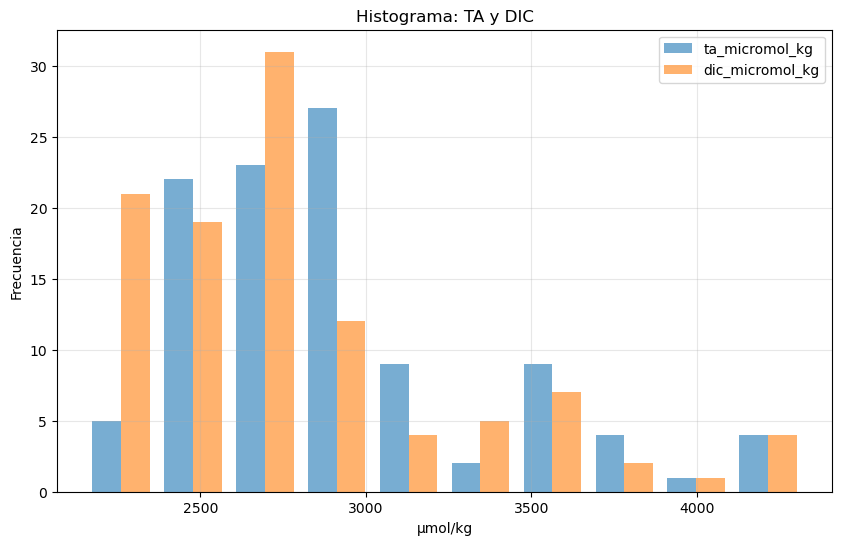

In [74]:
plot06 = dataframe_06[['ta_micromol_kg', 'dic_micromol_kg']]
plt.figure(figsize=(10, 6))
plt.hist([plot06['ta_micromol_kg'], plot06['dic_micromol_kg']], bins=10, label=plot06.columns.tolist(),alpha=0.6)
plt.xlabel("μmol/kg")
plt.ylabel("Frecuencia")
plt.title("Histograma: TA y DIC")
plt.legend()
plt.grid(alpha=0.3)
plt.show()